#HW4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 

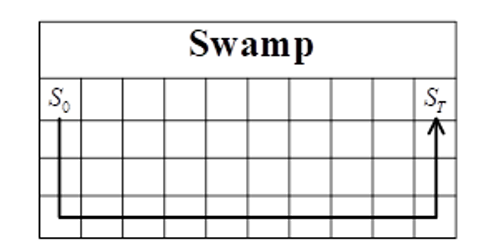

In [ ]:
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]
gamma = 1
alpha = 0.1
epsilon = 0.3
S0 = [0,3]
ST = [9,3]

In [ ]:
def step(state, action):
  swamp = [[0,4],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[8,4],[9,4]]
  
  state = np.array(state)
  state_n = (state+action)
  x , y = state_n
  x = np.clip(x,0,9)
  y = np.clip(y,0,4)
  state_n = [x , y]


  if state_n in swamp:
    reward = -100
  else:
    reward = -1
  
  return state_n, reward

In [ ]:
def epi_greedy(s,q,eps):
    
  rand_probability = rd.random()
  
  if rand_probability <= eps:
    choose = rd.randint(0,4)
  else:
    choose = np.argmax(q[s[0]][s[1]])
  
  return choose

In [ ]:
def Q_learning():
 
  returns = []
      
######## YOUR CODE HERE ########

  episode_num = 2000
  q_value = rd.rand(10,5,len(ACTIONS))
  q_value[9][3][:] = 0
  
  for i in range(episode_num):
      
    state = S0
    _returns = 0
    
    while state != ST:
        
      action_choose = epi_greedy(state,q_value,epsilon)  
      action = ACTIONS[action_choose]  
      state_ , reward = step(state,action)
      
      x , y = state
      x2 , y2 = state_

      action_choose_2 = np.argmax(q_value[x2][y2])
      
      a = action_choose
      a2 = action_choose_2     
      
      q_value[x][y][a] = q_value[x][y][a] + alpha*(reward+gamma*q_value[x2][y2][a2]-q_value[x][y][a])
      
      state = state_
      
      _returns = reward + _returns
      
    returns.append(_returns) 

####################################
      
    
  return returns

In [ ]:
def sarsa():
  
  returns = []
  
      
######## YOUR CODE HERE ########
  
  episode_num = 2000
  q_value = rd.rand(10,5,len(ACTIONS))
  q_value[9][3][:] = 0
  
  for i in range(episode_num):
      
    state = S0
    _returns = 0
    
    action_choose = epi_greedy(state,q_value,epsilon)
    
    while state != ST:
        
      action = ACTIONS[action_choose]  
      state_ , reward = step(state,action)
        
      action_choose_2 = epi_greedy(state_,q_value,epsilon)
      
      x , y = state
      x2 , y2 = state_
      
      a = action_choose
      a2 = action_choose_2
      
      q_value[x][y][a] = q_value[x][y][a] + alpha*(reward+gamma*q_value[x2][y2][a2]-q_value[x][y][a])
      
      state = state_
      action_choose = action_choose_2
      
      _returns = reward + _returns
      
    returns.append(_returns) 

####################################
  
  return returns

# Result(60%):

Average 30 simulation, 2000 episode per simulation.

In [ ]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

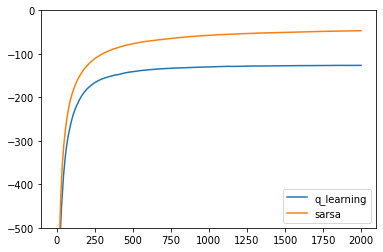

In [ ]:
plt.plot(np.average([averages(Q_learning()) for i in range(30)],axis=0),label='q_learning')
plt.plot(np.average([averages(sarsa()) for i in range(30)],axis=0),label='sarsa')
plt.ylim(-500, 0)
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the average rewards of Sarsa and Q-learning, and explain your result.(20%)
2. Plot the Q-values of Sarsa and Q-learning, and explain your result.(10%)
2. Complete Monte Carlo, and compare average rewards.(10%) 



Ans 1.

Sarsa以自身經驗去學習，所學習出來的策略會偏保守。因此在相同探索率(epsilon=0.3)下，相較於Q-learning目標在尋找出最佳策略，Sarsa學習過程會遠離swamp避免得到較低的Reward，因此整體Average Rewards會比Q-learning來的高。

Q-learning以他人經驗去學習，所學習出來的策略會偏侵略。因此在相同探索率(epsilon=0.3)下，相較於Sarsa為了避免得到較低的Reward會遠離swamp，Q-learning目標在尋找出最佳策略，因此整體Average Rewards會比Sarsa來的低，但也能因此尋找到最佳路徑。

由下圖可看出Sarsa和Q-learning之間Average Rewards的關係。

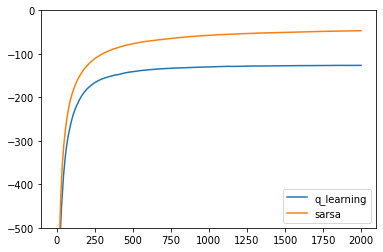

Ans 2.

在Q-learning中，可看出其跟隨最佳策略，在下圖State-Action Table中第二橫行的最佳動作為直接向右往終點前進。

對於Sarsa而言，其保守的策略選擇則會傾向於讓他遠離swamp，因此在下圖State-Action Table中第二橫行多數格子的最佳動作為向下遠離swamp後，再向右方的終點前進。

由下圖Sarsa和Q-learning的State-Action Table可看出他們之間Q-value的變化。

$\bullet\,Q-values\,of\,Q-learning$

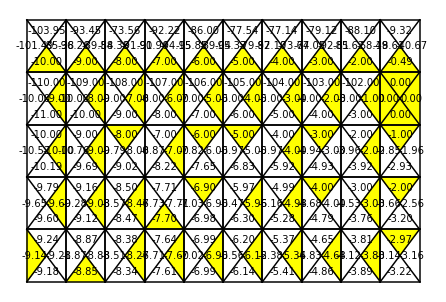

$\bullet\,Q-values\,of\,Sarsa$

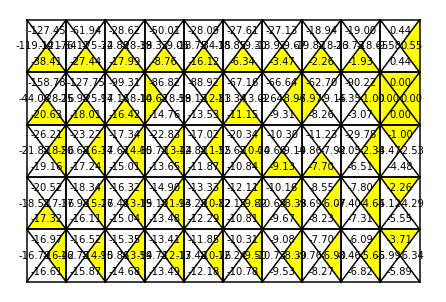

Ans 3.

Monte Carlo學習過程中所累積的Average Rewards，相較於Sarsa和Q-learning要來得低上許多。

由下圖可看出Monte Carlo與Sarsa、Q-learning之間Average Rewards的關係。

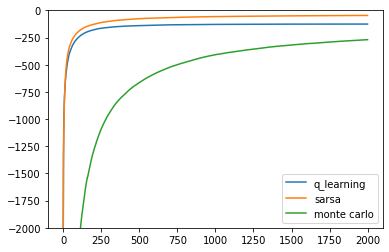